In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly
from matplotlib.animation import FuncAnimation

In [36]:
# Reading the the Global land by majorcity file

pd.options.plotting.backend = "plotly"
pd.set_option('display.width', 200)

plt.style.use('dark_background')

"""With pandas loaded data as a dataframe"""

df_City = pd.read_csv('GlobalLandTemperaturesByCity.csv')
df_MajorCity = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
# Display precise information about the DataFrame, including data types, non-null values, and memory usage
df_MajorCity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [38]:
#DATA CLEANING

"""### Count any missing values in each column, sort the results in descending order?"""


df_MajorCity.isnull().sum().sort_values(ascending=False)
# Find the common elements (intersection) between the unique values of 'City' in two DataFrames, df_MajorCity and df_City

# set(df_MajorCity.City.unique()).intersection(df_City.City.unique())

df_MajorCity_clean = df_MajorCity.loc[:,['dt','AverageTemperature','City']].copy()
# Drop null rows if any column value is null
df_MajorCity_clean = df_MajorCity_clean.dropna(how='any')
df_MajorCity_clean['dt'] = pd.to_datetime(df_MajorCity_clean['dt']) #convert dt to datetime format
df_MajorCity_clean['year'] = df_MajorCity_clean['dt'].dt.year #Create a new year column which has only year
df_MajorCity_clean = df_MajorCity_clean[df_MajorCity_clean['year']>=1750] # filter out on information from 1750 and above.
df_MajorCity_clean = df_MajorCity_clean.drop_duplicates() #drop duplicates
df_MajorCity_clean = df_MajorCity_clean.reset_index(drop=True) # Reset the index of the DataFrame df_MajorCity_clean and drop the previous index
df_MajorCity_clean.info()# Display precise information about the DataFrame, including data types, non-null values, and memory usage
#display statistical summary eg mean,count etc
df_MajorCity_clean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228006 entries, 0 to 228005
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   dt                  228006 non-null  datetime64[ns]
 1   AverageTemperature  228006 non-null  float64       
 2   City                228006 non-null  object        
 3   year                228006 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 6.1+ MB


,dt,AverageTemperature,year
count,228006,228006.000000,228006.000000
mean,1914-06-23 19:05:33.938579968,18.134369,1914.018964
min,1750-01-01 00:00:00,-26.772000,1750.000000
25%,1870-02-01 00:00:00,12.726000,1870.000000
50%,1918-09-01 00:00:00,20.438000,1918.000000
75%,1966-03-01 00:00:00,25.921000,1966.000000
max,2013-09-01 00:00:00,38.283000,2013.000000
std,NaN,10.021373,61.876666


In [68]:
# ploting timeseries graph

# Extract year and month from the 'dt' column
#data['year'] = data['dt'].dt.year
df_MajorCity_clean['month'] = df_MajorCity_clean['dt'].dt.month

# Filter years to from 1743 to 2013
data = df_MajorCity_clean[(df_MajorCity_clean['year'] == 2013) ]
# Sample of  countries to include in the visualization
sample_countries = ['United States', 'Russia', 'China', 'India', 'Brazil','Nigeria', 'Germany']

# Create an animated time series plot for sample countries
plt.figure(figsize=(10, 6))


def update(frame):
    plt.clf()
    df = data[data['year'] == frame]
    ax = sns.lineplot(x='year', y='AverageTemperature', hue='Country', data=df)
    ax.set_title(f'Temperature Changes Over Time (Year: {frame})')
    ax.set_xlabel('month')
    ax.set_ylabel('Average Temperature (°C)')

# Animating the plot
years = sorted(data['year'].unique())
#ani = FuncAnimation(plt.gcf(), update, frames=years, repeat=True, interval=500)

# Save the animation as a GIF or display it
#ani.save('temperature_changes.gif', writer='imagemagick')
print(data,sample_countries )
plt.show()

               dt  AverageTemperature     City  year  rank  month
1769   2013-01-01              27.751  Abidjan  2013   4.0      1
1770   2013-02-01              29.021  Abidjan  2013   3.0      2
1771   2013-03-01              29.129  Abidjan  2013   6.0      3
1772   2013-04-01              28.626  Abidjan  2013  21.0      4
1773   2013-05-01              27.652  Abidjan  2013  29.0      5
...           ...                 ...      ...   ...   ...    ...
228001 2013-04-01              12.563     Xian  2013  72.0      4
228002 2013-05-01              18.979     Xian  2013  66.0      5
228003 2013-06-01              23.522     Xian  2013  54.0      6
228004 2013-07-01              25.251     Xian  2013  48.0      7
228005 2013-08-01              24.528     Xian  2013  54.0      8

[807 rows x 6 columns] ['United States', 'Russia', 'China', 'India', 'Brazil', 'Nigeria', 'Germany']


<Figure size 1000x600 with 0 Axes>

In [39]:
# Finding  Cities with largest temperature ranges over time.

#  create a column rank and assign the 'AverageTemperature' values within each 'dt' group in df_MajorCity_clean.
df_MajorCity_clean["rank"] = df_MajorCity_clean.groupby("dt")["AverageTemperature"].\
rank(method="dense", ascending=False)
# Display the first few rows of  df_MajorCity_clean with the added 'rank' column
df_MajorCity_clean.head()
#counts of each rank for each city ( we have 4 ranks)
df_MajorCity_ranks = \
df_MajorCity_clean.groupby(['City','rank'])['rank'].count().rename('count').reset_index().\
  pivot(index='City', columns='rank', values='count').reset_index().\
  sort_values(by=[1,2,3,4], ascending=[False, False, False,False]).\
  reset_index(drop=True).\
  iloc[:,:5]

df_MajorCity_ranks = df_MajorCity_ranks.rename_axis(None, axis=1)
df_MajorCity_ranks.head(15)

,City,1.0,2.0,3.0,4.0
0,Riyadh,458.0,133.0,22.0,29.0
1,Izmir,347.0,146.0,52.0,34.0
2,Umm Durman,305.0,183.0,151.0,138.0
3,Fortaleza,278.0,97.0,87.0,40.0
4,Hyderabad,230.0,106.0,76.0,61.0
5,Baghdad,171.0,314.0,59.0,59.0
6,Ibadan,158.0,74.0,84.0,82.0
7,Nagpur,151.0,146.0,51.0,27.0
8,Bombay,119.0,100.0,72.0,70.0
9,Casablanca,117.0,158.0,46.0,28.0


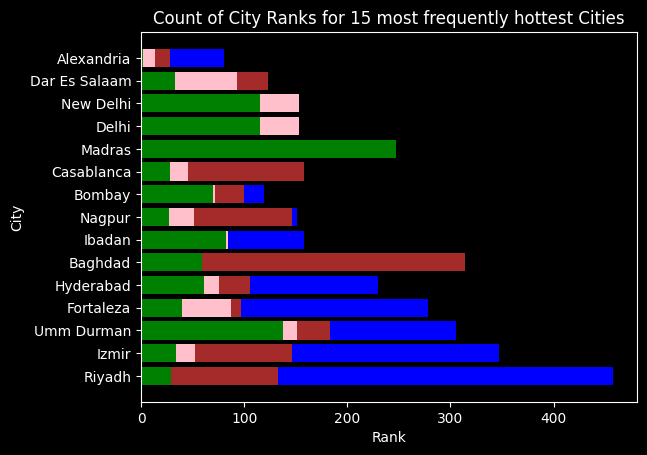

,dt,Abidjan,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
0,1750-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-8.613,NaN,NaN,NaN
1,1750-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-7.920,NaN,NaN,NaN
2,1750-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.468,NaN,NaN,NaN
3,1750-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.628,NaN,NaN,NaN
4,1750-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.169,NaN,NaN,NaN


In [60]:
# Ploting the hottest cities
# plot data in stack manner of bar type
data = (df_MajorCity_ranks.head(15)).set_index('City')
#assign colors to graph
cols = ["blue", "brown", "pink", "green"]
for rank, col in zip(data.columns, cols):
  plt.barh(data.index, data.loc[:,rank], color=col)
plt.xlabel("Rank")
plt.ylabel("City")
plt.title("Count of City Ranks for 15 most frequently hottest Cities")
data = px.data.medals_long()
plt.show()

data

df_MajorCity_dt = \
df_MajorCity_clean.pivot(index='dt', columns='City', values='AverageTemperature').reset_index()

df_MajorCity_dt = df_MajorCity_dt.rename_axis(None, axis=1)
df_MajorCity_dt.head()

In [7]:
# Work with topn cities
cities = ['dt'] + (df_MajorCity_ranks.nlargest(5, 1))['City'].tolist()
df_MajorCity_dt_viz = df_MajorCity_dt.loc[:,cities]
df_MajorCity_dt_viz = df_MajorCity_dt_viz.set_index('dt').dropna(how='any')
df_MajorCity_dt_viz.head()

# df_MajorCity_dt_viz.to_csv('df_MajorCity_dt_viz.csv')

,Riyadh,Izmir,Umm Durman,Fortaleza,Hyderabad
dt,,,,,
1887-01-01,12.816,9.786,21.397,25.666,22.563
1887-02-01,15.397,8.980,23.598,25.403,24.381
1887-03-01,18.755,12.312,26.608,25.129,28.854
1887-04-01,25.394,13.780,31.258,25.300,31.226
1887-05-01,29.501,19.992,33.091,25.470,32.373
